In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LassoCV


In [34]:
titanic=pd.read_csv('archive/tested.csv')

In [13]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [15]:
titanic['PassengerId'].value_counts()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

In [16]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
# titanic.isnull().sum()

In [18]:
titanic.shape

(418, 12)

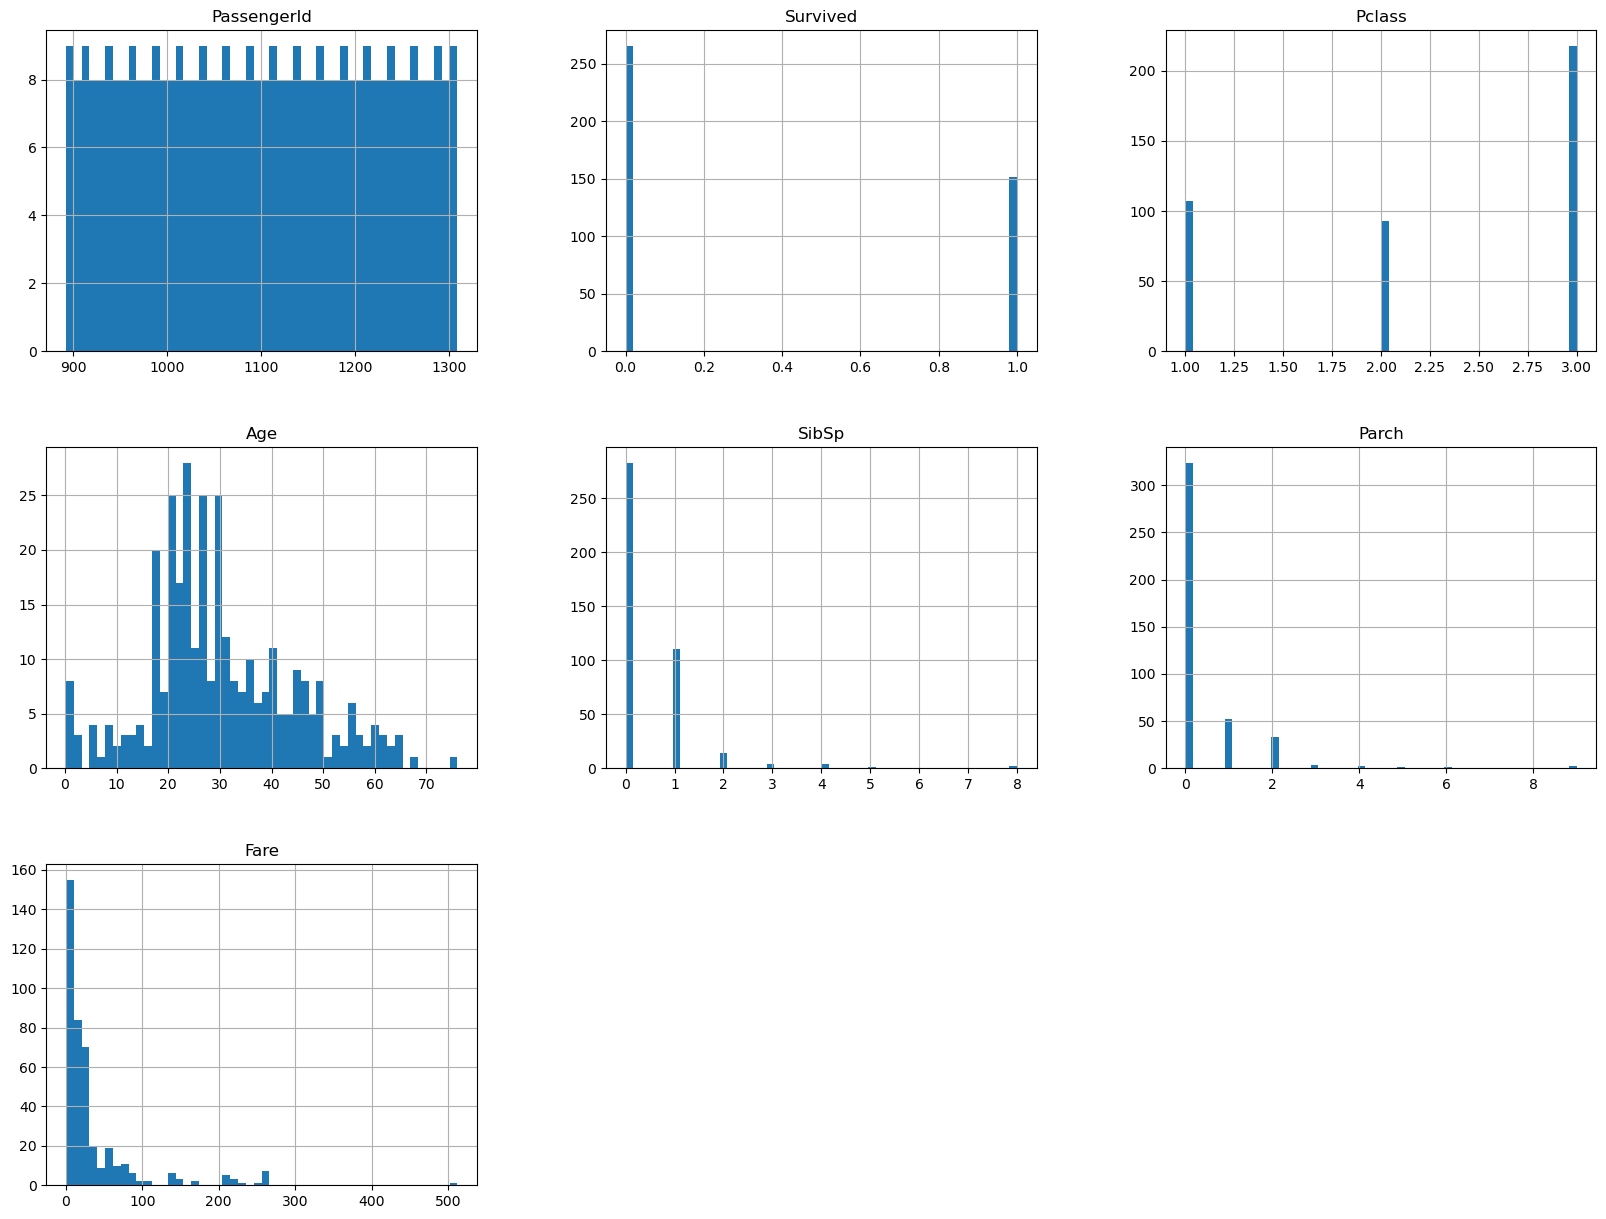

In [19]:
titanic.hist(bins=50,figsize=(20,15))
plt.show()

In [20]:
train_set,test_set=train_test_split(titanic,random_state=100,test_size=0.3,stratify=titanic['Survived'])

titanic=train_set

In [13]:
# titanic=titanic.drop(['Cabin','Name','Ticket'],axis=1)

In [22]:
# titanic.isnull().sum()

In [16]:
# titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

In [18]:
# titanic=titanic.dropna()

In [21]:
# titanic.isnull().sum()

In [23]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
titanic['Parch'].unique()

array([1, 0, 2, 3, 4, 9])

In [25]:
# titanic.loc[titanic['Sex']=='male','Sex']=1
# titanic.loc[titanic['Sex']=='female','Sex']=0

# titanic['Sex']=pd.to_numeric(titanic['Sex'])
# titanic.info()

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
192,1084,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S
134,1026,0,3,"Dintcheff, Mr. Valtcho",male,43.0,0,0,349226,7.8958,NaN,S
317,1209,0,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,28004,10.5000,NaN,S
135,1027,0,3,"Carlsson, Mr. Carl Robert",male,24.0,0,0,350409,7.8542,NaN,S
72,964,1,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S


In [27]:
# titanic=pd.get_dummies(titanic,columns=['Embarked'])

In [28]:
titanic.corr()['Survived']

/tmp/ipykernel_20431/4027338334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()['Survived']


PassengerId   -0.007919
Survived       1.000000
Pclass        -0.108371
Age            0.054808
SibSp          0.052525
Parch          0.213548
Fare           0.204776
Name: Survived, dtype: float64

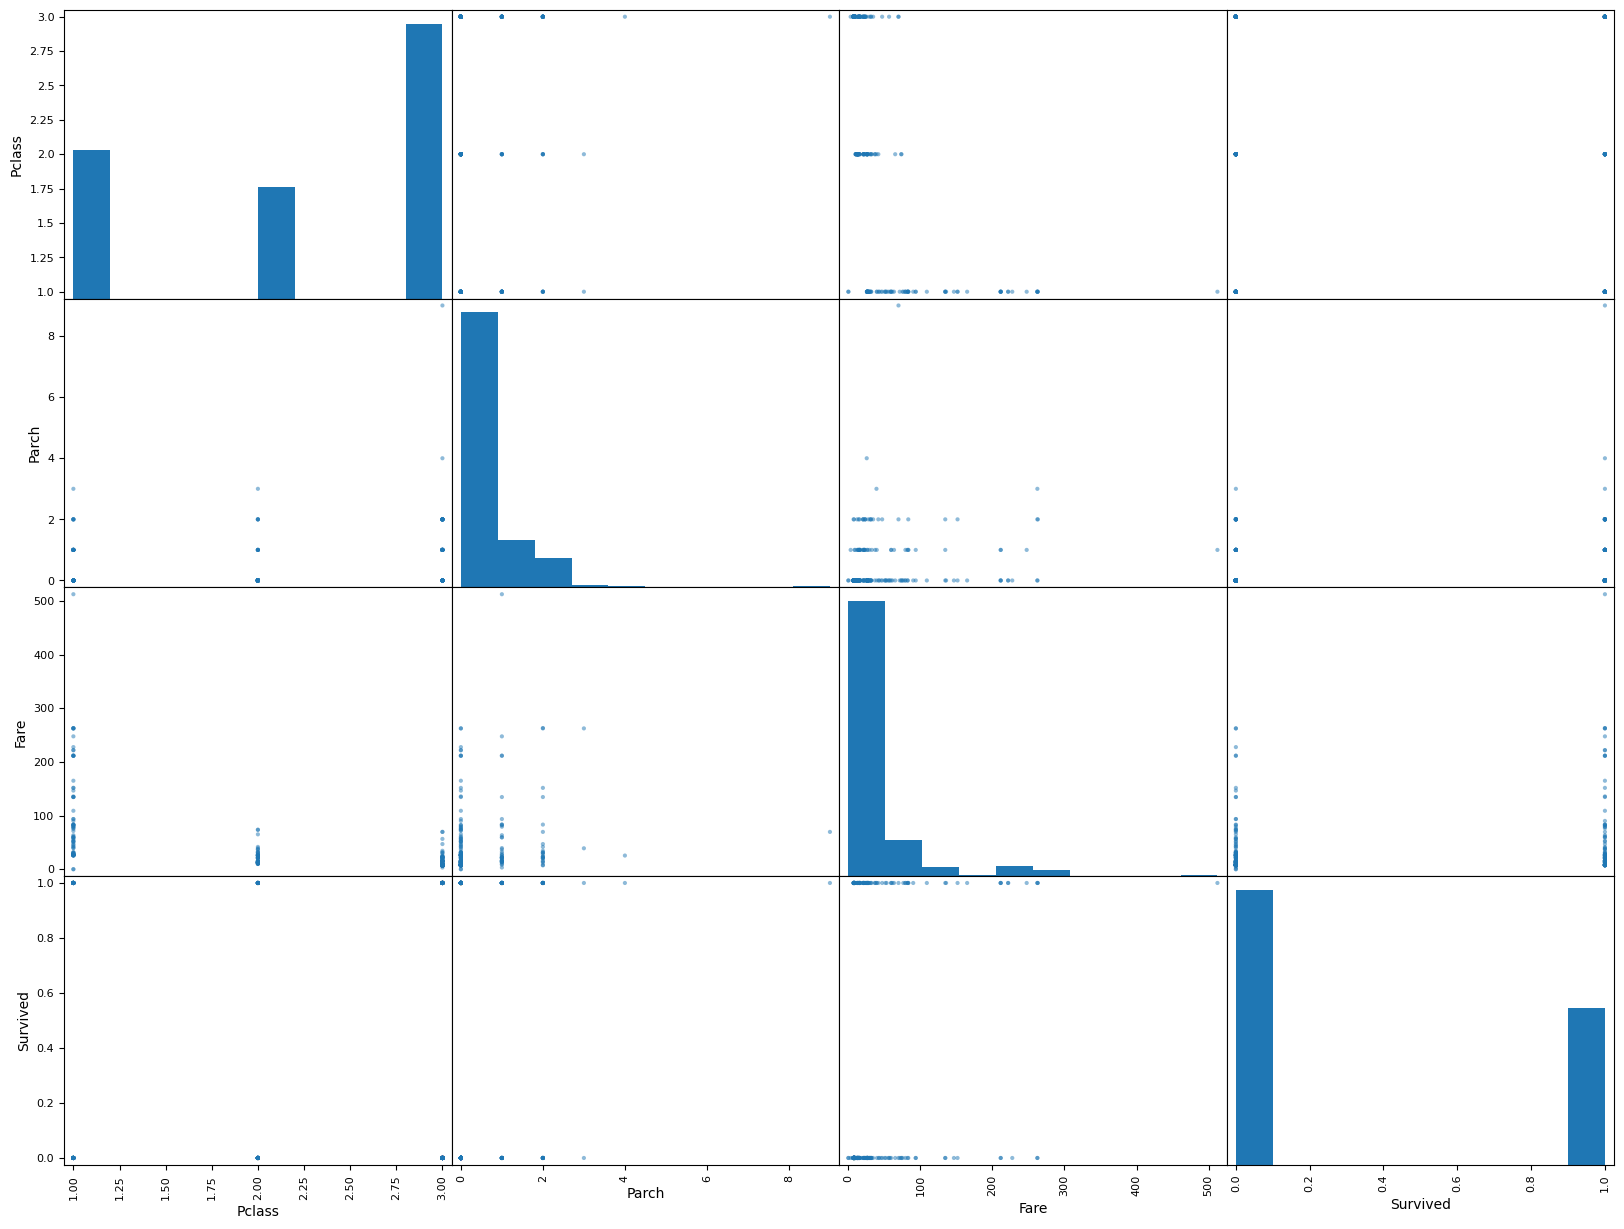

In [32]:
attributes=['Pclass','Sex','Parch','Fare','Embarked','Survived']
pd.plotting.scatter_matrix(titanic[attributes],figsize=(20,15))
plt.show()

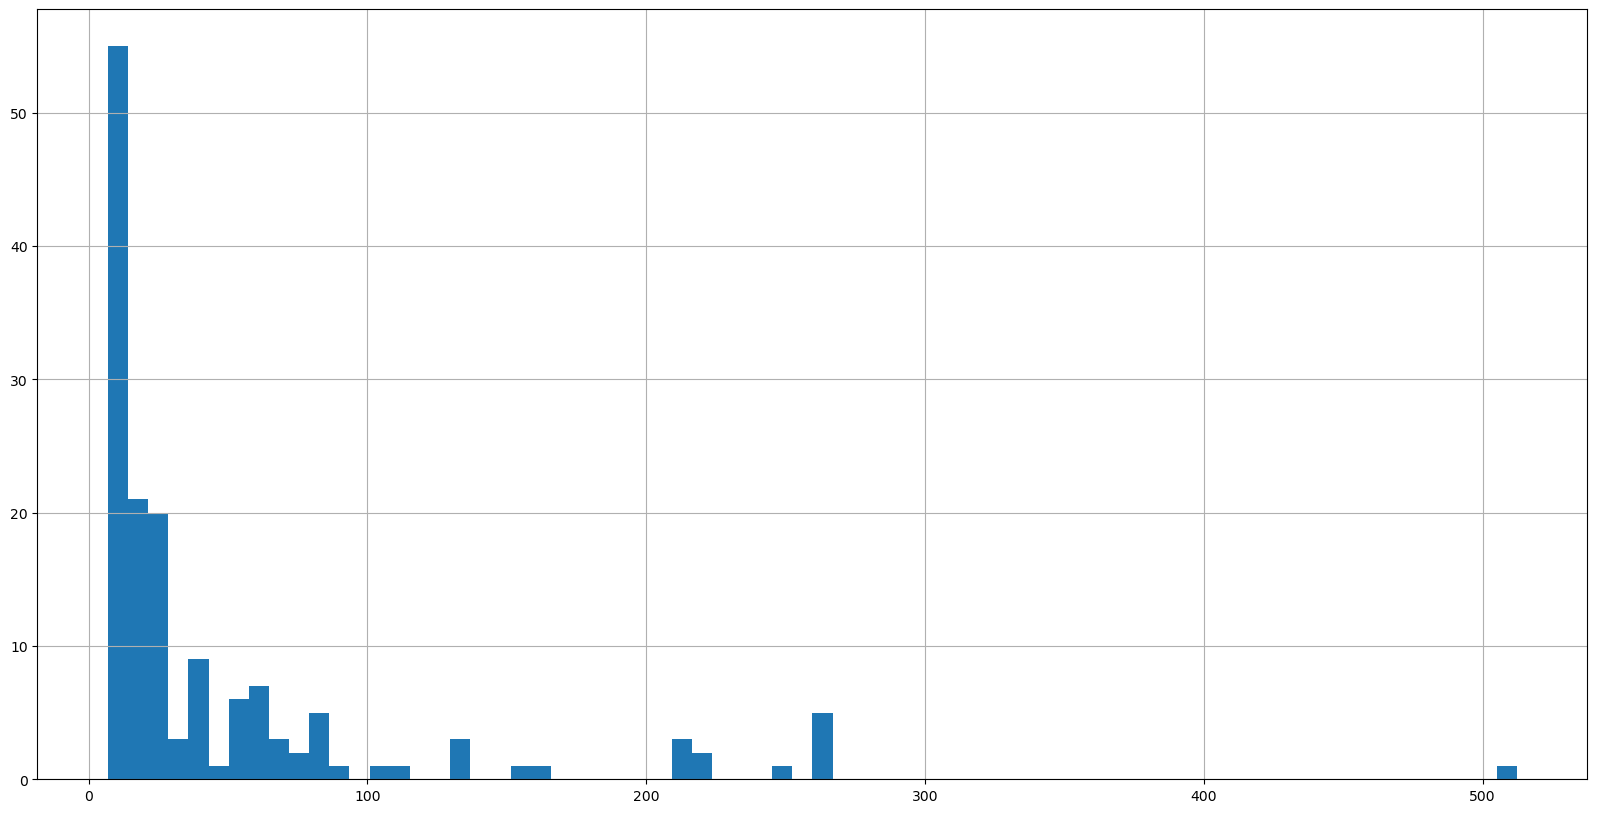

In [91]:
titanic.loc[(titanic['Survived']==1), 'Fare'].hist(bins=70,figsize=(20,10))
# hist(bins=70,figsize=[20,10])
plt.show()

In [87]:
titanic.loc[titanic['Embarked_C']==1,'Embarked_C'].count()

102

In [89]:
titanic.loc[titanic['Embarked_Q']==1,'Embarked_Q'].count()

46

In [88]:
titanic.loc[titanic['Embarked_S']==1,'Embarked_S'].count()

269

In [121]:
# help(titanic['Pclass'].plot)
# titanic['Pclass'].plot(kind='bar',x=[1,2,3])

In [111]:
fare=titanic['Pclass'].unique()

In [113]:
fare

array([3, 2, 1])

In [112]:
len(fare)

3